# Bayesian Inference

\begin{equation*}
P(A/B)   = \frac{P(B/A)*P(A)}{P(B)}
\end{equation*}

\begin{equation*}
P(A \cap  B)   = P(B/A)*P(A)
\end{equation*}

\begin{equation*}
P(B)   = \sum_{i=0..N} P(B/A_i)*P(A_i)
\end{equation*}

P(B/A) is also referred to as the likelihood (when B is the data and A is the model). P(A/B) is the posterior. P(A) is the prior and P(B) is the marginal. 

When to use a Bayesian treatment to a problem:

1. You have data around one set of conditional probabilities but the interesting question is the reverse conditional probability.
2. You want to update your prediction continuously as you learn more and more about your environment. (it gives us a way to update the probability of a hypothesis, H, in light of some body of data, D.) Diachronic interpretation.



Q. Given the following statistics, what is the probability that a woman has cancer if she has a positive mammogram result?

* One percent of women have breast cancer.
* Ninety percent of women who have breast cancer test positive on mammograms.
* Eight percent of women will have false positives.


### Answer here. Define the events and write out the conditional probability equations.

In [22]:
# reason out answer here


### How do we get a better probability distribution estimate by continually updating based on historical information

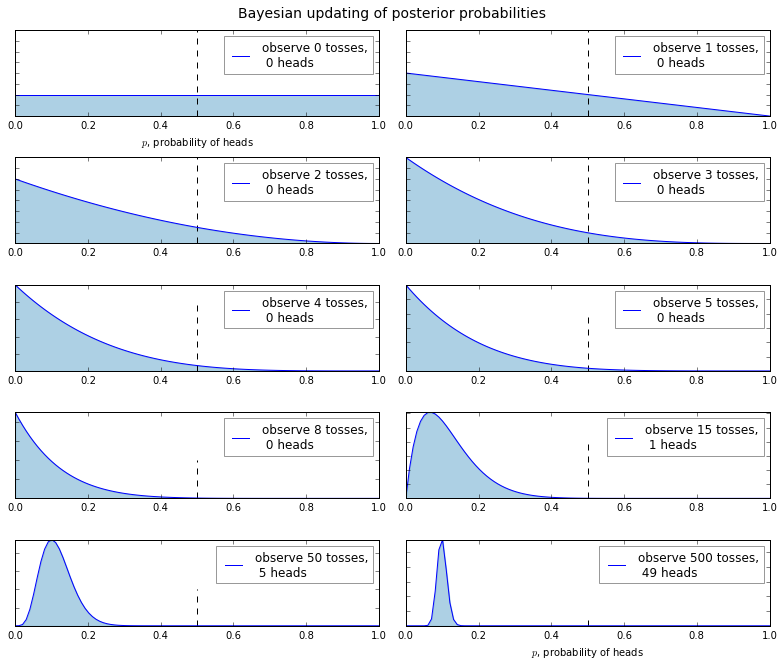

In [25]:

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.1, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()